In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import tensorflow as tf
import os

# Define the path to your dataset
path_to_dataset = 'dataset/'

# Use the list_files method to get a list of all image file paths in the dataset directory
all_files = tf.data.Dataset.list_files(os.path.join(path_to_dataset, '*.jpg'))
all_files = all_files.flat_map(lambda x: tf.data.Dataset.from_tensor_slices(tf.reshape(x, [-1])))
dataset = all_files


In [25]:
# for file_path in all_files.as_numpy_iterator():
#     print(file_path)

In [26]:

# Use the map method to load and decode the images
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image

dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Load the ResNet50 model pre-trained on ImageNet
model = ResNet50(weights='imagenet')

# Function to extract features from an image using ResNet50
def extract_features(image):
    image_batch = tf.expand_dims(image, axis=0)
    features = model.predict(image_batch)
    return features[0]


In [27]:

# Extract features from each image in the dataset
x_train_features = [extract_features(img) for img in dataset]

1/1 [==============================] - 0s 151ms/step


In [28]:
all_files_np = np.array(list(all_files.as_numpy_iterator()))
import pandas as pd

df = pd.DataFrame(list(zip(all_files_np, x_train_features)))
df.to_json('features_ResNet50.json')

In [29]:
######################################################

In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Define the number of clusters
n_clusters = 4

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x_train_features)

# Get the cluster assignments for each data point
clusters = kmeans.predict(x_train_features)


c:\Users\kateb\anaconda3\envs\newbase\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


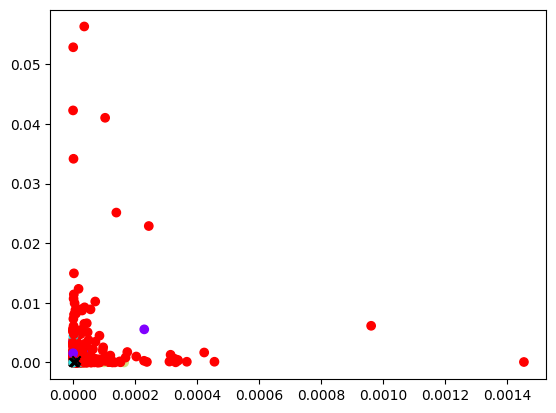

In [34]:
import matplotlib.pyplot as plt
X = np.array(x_train_features)
# Plot the data points colored by cluster assignment
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='black')

plt.show()

In [35]:
# Perform PCA on the features
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X)


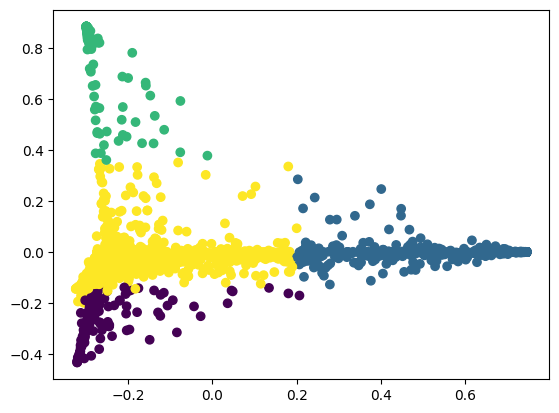

In [36]:

import matplotlib.pyplot as plt
# Plot the clusters using PCA
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters)
plt.show()